Columns in the dataset:
Index(['dteday', 'hr', 'casual', 'registered', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'season', 'holiday', 'workingday'],
      dtype='object')
Using target: workingday


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (4000, 219)                 │             439 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 439 (1.72 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 439 (1.72 KB)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7778 - loss: 0.4889 - val_accuracy: 1.0000 - val_loss: 0.0737 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0414 - val_accuracy: 1.0000 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 9.9385e-04 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.8784e-04 - val_accuracy: 1.0000 - val_loss: 5.9244e-04 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.3598e-04 - val_accuracy: 1.0000 - val_loss: 3.9149e-04 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.00

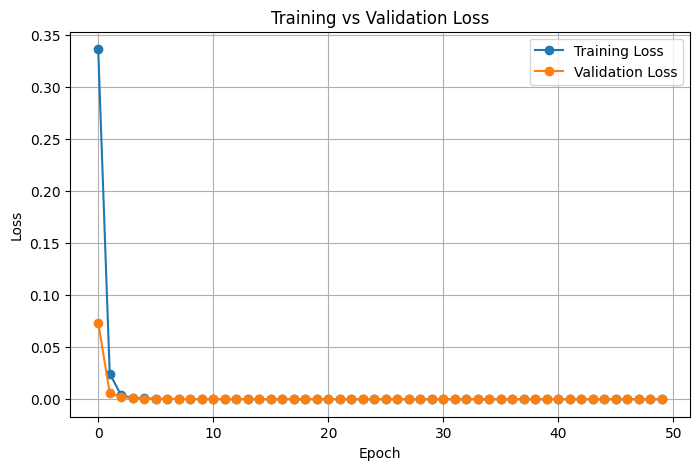

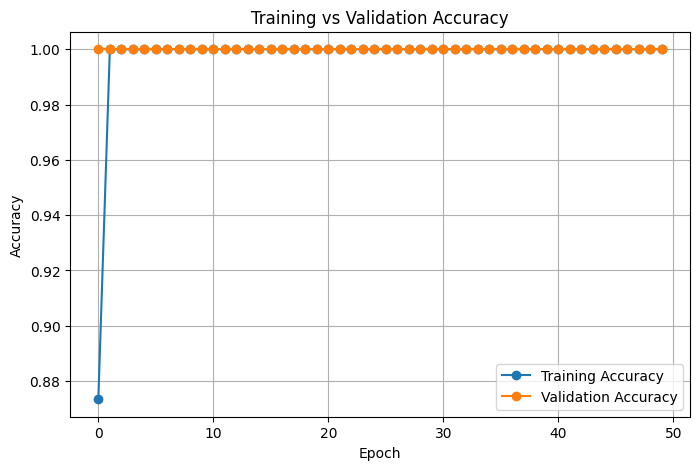

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


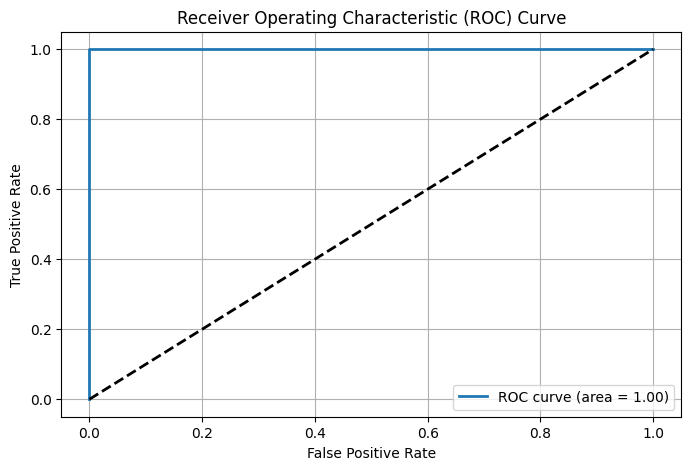

Confusion Matrix:
[[290   0]
 [  0 710]]


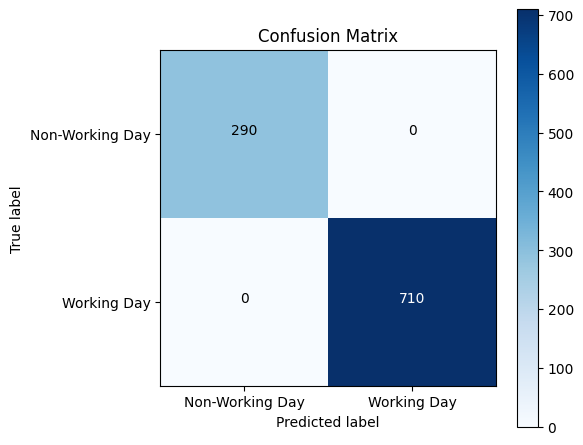

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np

# Load a subset of the training data to reduce memory usage
data_url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv'
bikes = pd.read_csv(data_url, nrows=5000)  # Load only 5,000 rows for this example

# Print dataset columns for verification
print("Columns in the dataset:")
print(bikes.columns)

# Use 'workingday' as the target variable (binary classification: 0 = non-working day, 1 = working day)
target = 'workingday'
print("Using target:", target)

# Separate features and labels
features = bikes.drop(columns=[target])
labels = bikes[target]

# Convert categorical features to dummy variables
features = pd.get_dummies(features)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a normalization layer and adapt it to the training data
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(X_train.values)

# Build the neural network model for binary classification
def build_model():
    model = keras.Sequential([
        normalizer,  # Normalize input features
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid for binary output
    ])

    # Compile the model using binary crossentropy loss and accuracy as the metric
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

# Optional: Reduce learning rate if validation loss plateaus
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[lr_callback],
    verbose=1
)

# -------------------------- Visuals for Reporting -------------------------- #

# 1. Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot ROC Curve and Calculate AUC
# Get model predictions for test data
y_pred_probs = model.predict(X_test).ravel()  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 4. Plot Confusion Matrix
# Convert predicted probabilities to binary predictions with threshold 0.5
y_pred = (y_pred_probs >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Working Day', 'Working Day'])
plt.yticks(tick_marks, ['Non-Working Day', 'Working Day'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
